In [1]:
import tensorflow as tf


In [2]:
x = tf.ones([2,3])

In [3]:
x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [4]:
x = tf.zeros([2,3])

In [5]:
x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [6]:
x = tf.random.normal(shape=(3,2),mean=0,stddev=1,dtype=tf.float64)

In [7]:
x

<tf.Tensor: shape=(3, 2), dtype=float64, numpy=
array([[ 0.19226565, -0.38751743],
       [-0.17314087, -0.24526653],
       [ 2.10083881, -1.01966383]])>

In [8]:
x = tf.random.uniform(shape=(4,),minval=0,maxval=2)
x

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1.7706709, 1.1253061, 1.7049246, 1.1913335], dtype=float32)>

In [9]:
v = tf.Variable(initial_value= tf.random.uniform([2,3]))
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[0.29238272, 0.10073698, 0.75769126],
       [0.62503743, 0.88374746, 0.6300218 ]], dtype=float32)>

In [10]:
v.assign(tf.zeros((2,3)))

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [11]:
v[0,0].assign(3)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[3., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [12]:
input = tf.Variable(initial_value=9.)
with tf.GradientTape() as tape:
    result = tf.square(input)
gradient = tape.gradient(result,input)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=18.0>

In [13]:
input = tf.constant(9.)
with tf.GradientTape() as tape:
    tape.watch(input)
    result = tf.square(input)
gradient = tape.gradient(result,input)
print(gradient)

tf.Tensor(18.0, shape=(), dtype=float32)


In [14]:
import numpy as np
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
 mean=[0, 3],
 cov=[[1, 0.5],[0.5, 1]],
 size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
 mean=[3, 0],
 cov=[[1, 0.5],[0.5, 1]],
 size=num_samples_per_class)

In [15]:
inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)
inputs.shape

(2000, 2)

In [16]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
 np.ones((num_samples_per_class, 1), dtype="float32")))

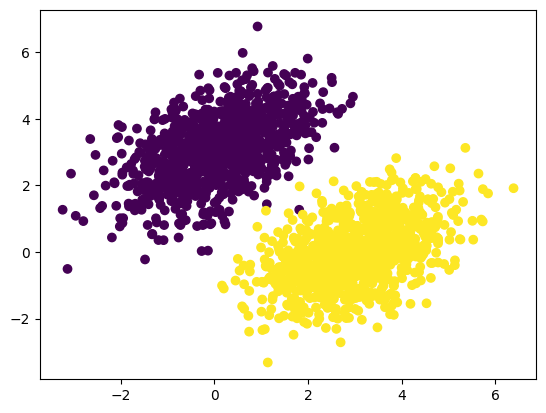

In [17]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [18]:
targets[:,0].shape

(2000,)

In [20]:
input_dim = 2
output_dim = 1
w = tf.Variable(initial_value= tf.random.uniform([input_dim,output_dim]))
b = tf.Variable(initial_value=tf.zeros([output_dim,]))

In [32]:
def model(inputs):
    x= tf.matmul(inputs,w) + b
    return x

In [33]:
def square_loss(targets, predictions):
     per_sample_losses = tf.square(targets - predictions)
     return tf.reduce_mean(per_sample_losses)

In [34]:
learning_rate = 0.1
def training_step(inputs, targets):
 with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
 grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [w, b])
 w.assign_sub(grad_loss_wrt_W * learning_rate)
 b.assign_sub(grad_loss_wrt_b * learning_rate)
 return loss

In [35]:
for step in range(40):
     loss = training_step(inputs, targets)
     print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.0248
Loss at step 1: 0.0248
Loss at step 2: 0.0248
Loss at step 3: 0.0248
Loss at step 4: 0.0248
Loss at step 5: 0.0248
Loss at step 6: 0.0248
Loss at step 7: 0.0248
Loss at step 8: 0.0248
Loss at step 9: 0.0248
Loss at step 10: 0.0247
Loss at step 11: 0.0247
Loss at step 12: 0.0247
Loss at step 13: 0.0247
Loss at step 14: 0.0247
Loss at step 15: 0.0247
Loss at step 16: 0.0247
Loss at step 17: 0.0247
Loss at step 18: 0.0247
Loss at step 19: 0.0247
Loss at step 20: 0.0247
Loss at step 21: 0.0247
Loss at step 22: 0.0247
Loss at step 23: 0.0247
Loss at step 24: 0.0247
Loss at step 25: 0.0247
Loss at step 26: 0.0247
Loss at step 27: 0.0247
Loss at step 28: 0.0247
Loss at step 29: 0.0247
Loss at step 30: 0.0247
Loss at step 31: 0.0247
Loss at step 32: 0.0247
Loss at step 33: 0.0247
Loss at step 34: 0.0247
Loss at step 35: 0.0247
Loss at step 36: 0.0247
Loss at step 37: 0.0247
Loss at step 38: 0.0247
Loss at step 39: 0.0247


tf.Tensor(
[[-0.01476663]
 [ 0.17261133]
 [-0.15080589]
 ...
 [ 1.0774649 ]
 [ 1.0987046 ]
 [ 1.0265265 ]], shape=(2000, 1), dtype=float32)


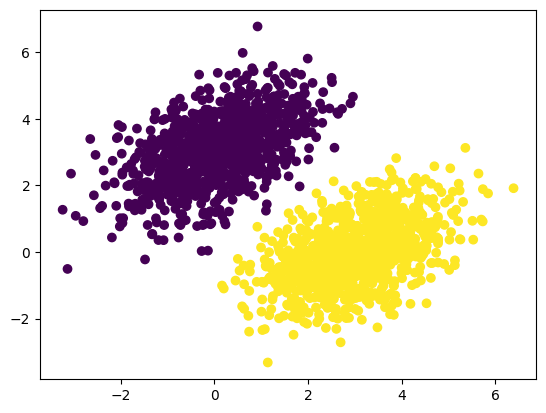

In [31]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

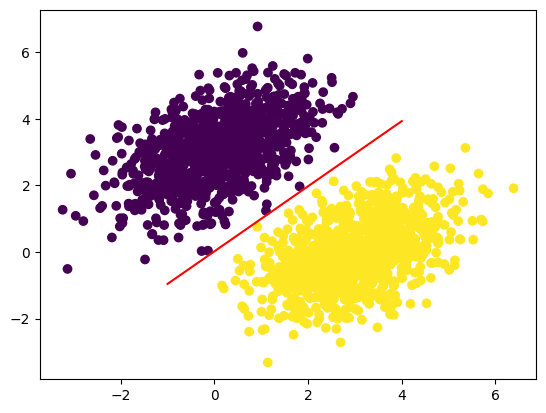

In [37]:
x = np.linspace(-1, 4, 100)
y = - w[0] / w[1] * x + (0.5 - b) / w[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

In [39]:
shape = (7,8)

In [40]:
shape[-1]

8